# Import


In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
#from keras import plot model
from keras.utils import plot_model



# LOAD DATA 

## Labélisation des données

In [2]:
df = pd.read_csv('datasetiot.csv')
df_revershell = pd.read_csv('revershell.csv')
df_keylogger = pd.read_csv('dataset_keylog.csv')
# keep 100 000 first rows
df = df.iloc[:100000]
# add columns empty columns to the dataframe this will be used to store the labels
df['label'] = np.nan
df['label'] = df['label'].astype('category')
df_revershell['label'] = np.nan
df_revershell['label'] = df_revershell['label'].astype('category')
df_keylogger['label'] = np.nan
df_keylogger['label'] = df_keylogger['label'].astype('category')

# set label for df_revershell and df_keylogger
df_revershell.loc[:, 'label'] = 'Reverse Shell'
# duplicate 5 times the reverse shell dataset
df_revershell = df_revershell.append([df_revershell] * 22, ignore_index=True)
df_keylogger.loc[:, 'label'] = 'Keylogger'

#set category types
df['label'].cat.set_categories(['Normal', 'Keylogger', 'Reverse Shell', 'SYN Flood'], inplace=True)


# line 0 to 5150 is FTP traffic
df.loc[0:5150, 'label'] = 'Normal'
# line 5151 to 18600 is SSH traffic
df.loc[5151:18600, 'label'] = 'Normal'
# line 18601 to 28000 is FTP + SSH traffic
df.loc[18601:28000, 'label'] = 'Normal'
# line 28000 to 40100 is Keylogger traffic
df.loc[28000:40100, 'label'] = 'Keylogger'
# line 40101 to 46500 is FTP + SSH 
df.loc[40101:46500, 'label'] = 'Normal'
# line 46501 to 54100 is Reverse Shell
df.loc[46501:54100, 'label'] = 'Reverse Shell'
# line 54101 to 57150 is FTP + SSH
df.loc[54101:57150, 'label'] = 'Normal'
# the rest is syn flood
df.loc[57151:, 'label'] = 'SYN Flood'

df_copy = df.copy()
reverse_shell_packets = df.loc[df['label'] == 'Reverse Shell']
duplicated_reverse_shell_packets = reverse_shell_packets.copy()
duplicated_reverse_shell_packets['No.'] = df['No.'].max() + np.arange(1, len(duplicated_reverse_shell_packets) + 1)
duplicated_reverse_shell_packets['Time'] = df['Time'].max() + np.arange(1, len(duplicated_reverse_shell_packets) + 1)
df_copy = df_copy.append(duplicated_reverse_shell_packets, ignore_index=True)



# duplicate paquet labelised as Reverse Shell and put it at the end of the dataset




C:\Users\enzoh\AppData\Local\Temp\ipykernel_33920\3706480118.py:15: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_revershell.loc[:, 'label'] = 'Reverse Shell'
C:\Users\enzoh\AppData\Local\Temp\ipykernel_33920\3706480118.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_revershell = df_revershell.append([df_revershell] * 22, ignore_index=True)
C:\Users\enzoh\AppData\Local\Temp\ipykernel_33920\3706480118.py:18: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
 

In [13]:
time_diff = df['Time'].diff()

# Calculate mean time difference
mean_time_diff = time_diff.mean()

# Print the result
print(f"The mean time evolution between 2 packets is {mean_time_diff}")

The mean time evolution between 2 packets is 0.08740466184847848


In [3]:
# find mean evolution of column time for reverse shell label and keylogger label
df_copy['Time'] = pd.to_datetime(df_copy['Time'], unit='s')


In [4]:
# show labels for protocol DNS
dns_labels = df.loc[df['Protocol'] == 'DNS', 'label'].value_counts()
ftp_labels = df.loc[df['Protocol'] == 'FTP', 'label'].value_counts()
tls1_labels = df.loc[df['Protocol'] == 'TLSv1', 'label'].value_counts()
tls12_labels = df.loc[df['Protocol'] == 'TLSv1.2', 'label'].value_counts()
tls11_labels = df.loc[df['Protocol'] == 'TLSv1.1', 'label'].value_counts()
ssdp_labels = df.loc[df['Protocol'] == 'SSDP', 'label'].value_counts()
ftpdata_labels = df.loc[df['Protocol'] == 'FTP-DATA', 'label'].value_counts()
ntpdata_labels = df.loc[df['Protocol'] == 'NTP', 'label'].value_counts()
arp_labels = df.loc[df['Protocol'] == 'ARP', 'label'].value_counts()
dhcp_labels = df.loc[df['Protocol'] == 'DHCP', 'label'].value_counts()

total_labels = dns_labels.add(ftp_labels, fill_value=0)
total_labels = total_labels.add(tls1_labels, fill_value=0)
total_labels = total_labels.add(tls12_labels, fill_value=0)
total_labels = total_labels.add(ssdp_labels, fill_value=0)
total_labels = total_labels.add(ftpdata_labels, fill_value=0)
print(total_labels)


Normal           11413
Keylogger          945
Reverse Shell     1511
SYN Flood           41
Name: label, dtype: int64


In [7]:
# show labels for protocol  FTP, and TLSv1 and TLSv1.2 and SSDP AND FTP-DATA
# df.loc[df['Protocol'].isin(['FTP', 'TLSv1', 'TLSv1.2', 'SSDP', 'FTP-DATA']), 'label'].value_counts()
# # class these protocols as normal
# df.loc[df['Protocol'].isin(['FTP', 'TLSv1', 'TLSv1.2', 'SSDP', 'FTP-DATA']), 'label'] = 'Normal'

In [5]:
# concatenate the 3 dataframes
df = pd.concat([df, df_revershell, df_keylogger], ignore_index=True)
# make the column No. as a iteration  (+1 +1 +1 +1 ) start as 1
df['No.'] = np.arange(1, len(df) + 1)

## Quelques visualisations

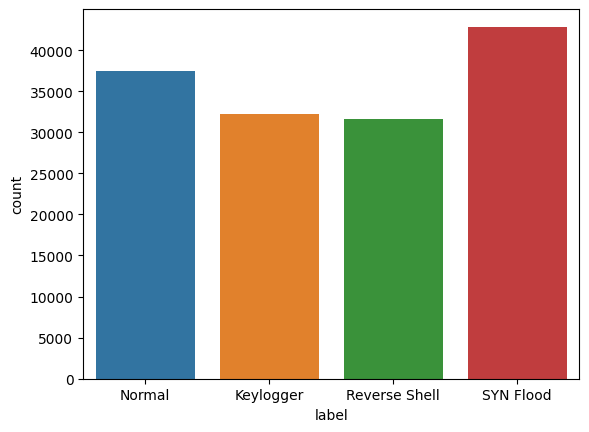

In [6]:
# plot diffrent features
# plot the distribution of the label
sns.countplot(x='label', data=df)
plt.show()
    

In [7]:
# show how many packets are in total
print(f"Total number of packets: {len(df)}")
# print how many packets are in each label
print(df['label'].value_counts())


Total number of packets: 144046
SYN Flood        42849
Normal           37450
Keylogger        32181
Reverse Shell    31566
Name: label, dtype: int64


In [10]:
# print all features
print(df.columns)

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info',
       'label'],
      dtype='object')


## Preprocessing


In [11]:
# preprocess the data
# drop the columns that are not needed "No" , "Time"
#df = df.drop(['No.', 'Time'], axis=1)


In [9]:
 # show 20 last rows
print(df.tail(20))

           No.        Time          Source     Destination Protocol  Length  \
144026  144027  281.374603      172.16.0.4  172.16.208.128      TCP      66   
144027  144028  281.374714  172.16.208.128      172.16.0.4      TCP      66   
144028  144029  281.375445  172.16.208.128      172.16.0.4      TCP      66   
144029  144030  281.375808      172.16.0.4  172.16.208.128      TCP      66   
144030  144031  281.431554      172.16.0.4  172.16.208.128      TCP      74   
144031  144032  281.431625  172.16.208.128      172.16.0.4      TCP      74   
144032  144033  281.432382      172.16.0.4  172.16.208.128      TCP      66   
144033  144034  281.432658      172.16.0.4  172.16.208.128      TCP      67   
144034  144035  281.432670      172.16.0.4  172.16.208.128      TCP      66   
144035  144036  281.432903  172.16.208.128      172.16.0.4      TCP      66   
144036  144037  281.433686  172.16.208.128      172.16.0.4      TCP      66   
144037  144038  281.434160      172.16.0.4  172.16.2

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df.head()

df_copy['label'] = label_encoder.fit_transform(df_copy['label'])

# convert categorical data to numerical data
df['Protocol'] = df['Protocol'].astype('category')
df['Protocol'] = df['Protocol'].cat.codes
df['Source'] = df['Source'].astype('category')
df['Source'] = df['Source'].cat.codes
df['Destination'] = df['Destination'].astype('category')
df['Destination'] = df['Destination'].cat.codes
df['Info'] = df['Info'].astype('category')
df['Info'] = df['Info'].cat.codes
df.head()

df_copy['Protocol'] = df_copy['Protocol'].astype('category')
df_copy['Protocol'] = df_copy['Protocol'].cat.codes
df_copy['Source'] = df_copy['Source'].astype('category')
df_copy['Source'] = df_copy['Source'].cat.codes
df_copy['Destination'] = df_copy['Destination'].astype('category')
df_copy['Destination'] = df_copy['Destination'].cat.codes
df_copy['Info'] = df_copy['Info'].astype('category')
df_copy['Info'] = df_copy['Info'].cat.codes
df_copy.head()


# label_encoders = {}
# for column in df.columns:
#     if df[column].dtype == type(object):
#         label_encoders[column] = LabelEncoder()
#         df[column] = label_encoders[column].fit_transform(df[column])

# df.head()


,No.,Time,Source,Destination,Protocol,Length,Info,label
0,1,1970-01-01 00:00:00.000000000,10155,11194,13,166,76629,1
1,2,1970-01-01 00:00:00.060724710,10155,11194,13,171,76629,1
2,3,1969-12-31 23:59:59.998608377,8070,11194,13,166,76629,1
3,4,1970-01-01 00:00:00.060622845,8070,11194,13,171,76629,1
4,5,1970-01-01 00:00:10.001487764,10155,11194,13,166,76629,1


In [14]:
df.dtypes

No.              int32
Time           float64
Source           int16
Destination      int16
Protocol          int8
Length           int64
Info             int32
label            int32
dtype: object

In [9]:
# vlaue count of label
df['label'].value_counts()

3    42849
1    37450
0    32181
2    31566
Name: label, dtype: int64

## Création des données d'entrainement et de test

In [11]:
import pandas as pd
import numpy as np

def format_data_time_step(data, time_step):
    """
    Format time-series data into a format suitable for training a recurrent neural network.

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame containing the time-series data. The DataFrame should contain a 'label' column
        and one or more feature columns.

    time_step : int
        The number of time steps (i.e., rows) to include in each sample.

    Returns
    -------
    tuple
        A tuple containing the following six elements in the order given:

        train_data : numpy.ndarray
            An array of shape (n_samples_train, time_step, n_features) containing the training data.

        train_labels : numpy.ndarray
            An array of shape (n_samples_train,) containing the training labels.

        val_data : numpy.ndarray
            An array of shape (n_samples_val, time_step, n_features) containing the validation data.

        val_labels : numpy.ndarray
            An array of shape (n_samples_val,) containing the validation labels.

        test_data : numpy.ndarray
            An array of shape (n_samples_test, time_step, n_features) containing the test data.

        test_labels : numpy.ndarray
            An array of shape (n_samples_test,) containing the test labels.

    Notes
    -----
    This function splits the data into training, validation, and test sets and reshapes the data into
    samples of length `time_step`. The training set includes the first 70% of the data, the validation
    set includes the next 15%, and the test set includes the final 15%. But this is totally arbitrary so dont realy take in account
    """
    unique_labels = data['label'].unique()

    train_df = pd.DataFrame(columns=data.columns)
    val_df = pd.DataFrame(columns=data.columns)
    test_df = pd.DataFrame(columns=data.columns)

    for label in unique_labels:
        label_df = data[data['label'] == label]
        train_samples = label_df.iloc[:int(len(label_df) * 0.60)]
        test_samples = label_df.iloc[int(len(label_df) * 0.60):int(len(label_df) * 0.75)]
        val_samples = label_df.iloc[int(len(label_df) * 0.75):]

        train_df = train_df.append(train_samples)
        val_df = val_df.append(val_samples)
        test_df = test_df.append(test_samples)

    #train df 

    # Define a function to reshape the input data into the required format for LSTM models
    def reshape_data(data):
        data_list = []
        for i in range(len(data) - time_step + 1):
            data_list.append(data[i:i+time_step, :])
        return np.array(data_list)

    # Reshape the training data and extract the labels
    train_data = reshape_data(train_df.drop(['label'], axis=1).to_numpy())
    train_labels = train_df['label'].iloc[time_step-1:].to_numpy()

    # Reshape the validation data and extract the labels
    val_data = reshape_data(val_df.drop(['label'], axis=1).to_numpy())
    val_labels = val_df['label'].iloc[time_step-1:].to_numpy()

    # Reshape the test data and extract the labels
    test_data = reshape_data(test_df.drop(['label'], axis=1).to_numpy())
    test_labels = test_df['label'].iloc[time_step-1:].to_numpy()

    train_data = train_data.astype('float32')
    train_labels = train_labels.astype('float32')
    val_data = val_data.astype('float32')
    val_labels = val_labels.astype('float32')
    test_data = test_data.astype('float32')
    test_labels = test_labels.astype('float32')
    return train_data, train_labels, val_data, val_labels, test_data, test_labels



In [12]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = format_data_time_step(df, 128)

# print the shape of every data with their name
print('train_data shape: ', train_data.shape)
print('train_labels shape: ', train_labels.shape)
print('val_data shape: ', val_data.shape)
print('val_labels shape: ', val_labels.shape)
print('test_data shape: ', test_data.shape)
print('test_labels shape: ', test_labels.shape)






C:\Users\enzoh\AppData\Local\Temp\ipykernel_33920\3386209712.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(train_samples)
C:\Users\enzoh\AppData\Local\Temp\ipykernel_33920\3386209712.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val_df = val_df.append(val_samples)
C:\Users\enzoh\AppData\Local\Temp\ipykernel_33920\3386209712.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(test_samples)
C:\Users\enzoh\AppData\Local\Temp\ipykernel_33920\3386209712.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(train_samples)
C:\Users\enzoh\AppData\Local\

train_data shape:  (86299, 128, 7)
train_labels shape:  (86299,)
val_data shape:  (35887, 128, 7)
val_labels shape:  (35887,)
test_data shape:  (21479, 128, 7)
test_labels shape:  (21479,)


In [13]:
# print value count of every label
print('train_labels value count: ', pd.Series(train_labels).value_counts())
print('val_labels value count: ', pd.Series(val_labels).value_counts())
print('test_labels value count: ', pd.Series(test_labels).value_counts())


train_labels value count:  3.0    25709
1.0    22343
0.0    19308
2.0    18939
dtype: int64
val_labels value count:  3.0    10713
1.0     9236
0.0     8046
2.0     7892
dtype: int64
test_labels value count:  3.0    6427
1.0    5490
0.0    4827
2.0    4735
dtype: int64


In [14]:
total_len = len(train_data) + len(val_data) + len(test_data)
print('total_len: ', total_len)

total_len:  143665


# Définition et entrainement des modèles

In [15]:
num_labels = len(np.unique(train_labels))
print(num_labels)


4


In [16]:
input_shape = (train_data.shape[1], train_data.shape[2])

In [79]:
# normalize the data with standard scaler
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.reshape(-1, train_data.shape[2])).reshape(train_data.shape)
val_data = scaler.transform(val_data.reshape(-1, val_data.shape[2])).reshape(val_data.shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[2])).reshape(test_data.shape)



In [16]:
train_data

array([[[ 1.0000000e+00,  0.0000000e+00,  1.0155000e+04, ...,
          1.3000000e+01,  1.6600000e+02,  9.7008000e+04],
        [ 2.0000000e+00,  6.0724709e-02,  1.0155000e+04, ...,
          1.3000000e+01,  1.7100000e+02,  9.7008000e+04],
        [ 3.0000000e+00, -1.3916231e-03,  8.0700000e+03, ...,
          1.3000000e+01,  1.6600000e+02,  9.7008000e+04],
        ...,
        [ 1.2600000e+02,  1.2486438e+01,  3.8810000e+03, ...,
          1.5000000e+01,  6.0000000e+01,  4.5360000e+04],
        [ 1.2700000e+02,  1.2542718e+01,  3.8810000e+03, ...,
          1.6000000e+01,  2.9930000e+03,  9.6771000e+04],
        [ 1.2800000e+02,  1.2542754e+01,  1.0156000e+04, ...,
          1.5000000e+01,  5.4000000e+01,  4.0224000e+04]],

       [[ 2.0000000e+00,  6.0724709e-02,  1.0155000e+04, ...,
          1.3000000e+01,  1.7100000e+02,  9.7008000e+04],
        [ 3.0000000e+00, -1.3916231e-03,  8.0700000e+03, ...,
          1.3000000e+01,  1.6600000e+02,  9.7008000e+04],
        [ 4.0000000e+00, 

### Simple LSTM

In [17]:
# create the model
simple_lstm_model = keras.Sequential([
    keras.layers.LSTM(128, input_shape=input_shape),
    keras.layers.Dense(num_labels, activation='softmax')
])

simple_lstm_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

simple_lstm_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 70,148
Trainable params: 70,148
Non-trainable params: 0
_________________________________________________________________


In [18]:
history_simple_lstm = simple_lstm_model.fit(train_data, train_labels, epochs=5,batch_size=256 ,validation_data=(val_data, val_labels))


Epoch 1/5
338/338 [==============================] - 13s 21ms/step - loss: 0.5558 - accuracy: 0.8252 - val_loss: 1.2789 - val_accuracy: 0.5793
Epoch 2/5
338/338 [==============================] - 6s 18ms/step - loss: 0.2974 - accuracy: 0.9195 - val_loss: 1.4441 - val_accuracy: 0.6493
Epoch 3/5
338/338 [==============================] - 6s 19ms/step - loss: 0.1893 - accuracy: 0.9573 - val_loss: 1.4426 - val_accuracy: 0.6826
Epoch 4/5
338/338 [==============================] - 6s 19ms/step - loss: 0.1621 - accuracy: 0.9685 - val_loss: 1.6545 - val_accuracy: 0.6676
Epoch 5/5
338/338 [==============================] - 6s 19ms/step - loss: 0.1412 - accuracy: 0.9674 - val_loss: 1.8036 - val_accuracy: 0.7076


In [19]:
simple_lstm_model.evaluate(test_data, test_labels)
# model_stacked_lstm.evaluate(test_data, test_labels)

672/672 [==============================] - 5s 7ms/step - loss: 0.2539 - accuracy: 0.9357


[0.25394853949546814, 0.9356580972671509]

### Stacked LSTM

In [38]:

# model with 4 LSTM layers
model_stacked_lstm = keras.Sequential([
    keras.layers.LSTM(128, return_sequences=True, input_shape=input_shape),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(64),
    keras.layers.Dense(num_labels, activation='softmax')
])

model_stacked_lstm.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_stacked_lstm.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128, 128)          69632     
                                                                 
 lstm_6 (LSTM)               (None, 128, 128)          131584    
                                                                 
 lstm_7 (LSTM)               (None, 128, 128)          131584    
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 382,468
Trainable params: 382,468
Non-trainable params: 0
_________________________________________________________________


In [41]:
history_stacked_lstm = model_stacked_lstm.fit(train_data, train_labels, epochs=10,batch_size=256 ,validation_data=(val_data, val_labels))


Epoch 1/10
85/85 [==============================] - 7s 87ms/step - loss: 0.0212 - accuracy: 0.9944 - val_loss: 3.1928 - val_accuracy: 0.6453
Epoch 2/10
85/85 [==============================] - 8s 92ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 3.3278 - val_accuracy: 0.6537
Epoch 3/10
85/85 [==============================] - 7s 86ms/step - loss: 0.0354 - accuracy: 0.9902 - val_loss: 3.8829 - val_accuracy: 0.5882
Epoch 4/10
85/85 [==============================] - 7s 85ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 4.1835 - val_accuracy: 0.5827
Epoch 5/10
85/85 [==============================] - 7s 85ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 3.9973 - val_accuracy: 0.6060
Epoch 6/10
85/85 [==============================] - 7s 85ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 3.8229 - val_accuracy: 0.6254
Epoch 7/10
85/85 [==============================] - 7s 85ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 3.5247 - val_accuracy: 0.6658
Epoch 8/10
85

In [42]:
model_stacked_lstm.evaluate(test_data, test_labels)

672/672 [==============================] - 14s 20ms/step - loss: 1.0878 - accuracy: 0.8830


[1.0878455638885498, 0.883001983165741]

### stacked LSTM Lighter and dropout

C'esst pour faire le test car le modèle précédent overfit

In [28]:
model_stacked_lstm_dropout = keras.Sequential([
    keras.layers.LSTM(64, return_sequences=True, input_shape=input_shape),
    keras.layers.Dropout(0.5),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.Dropout(0.5),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.Dropout(0.5),
    keras.layers.LSTM(32),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_labels, activation='softmax')
])

model_stacked_lstm_dropout.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [21]:
model_stacked_lstm_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128, 64)           18432     
                                                                 
 dropout (Dropout)           (None, 128, 64)           0         
                                                                 
 lstm_2 (LSTM)               (None, 128, 64)           33024     
                                                                 
 dropout_1 (Dropout)         (None, 128, 64)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128, 32)           12416     
                                                                 
 dropout_2 (Dropout)         (None, 128, 32)           0         
                                                                 
 lstm_4 (LSTM)               (None, 32)               

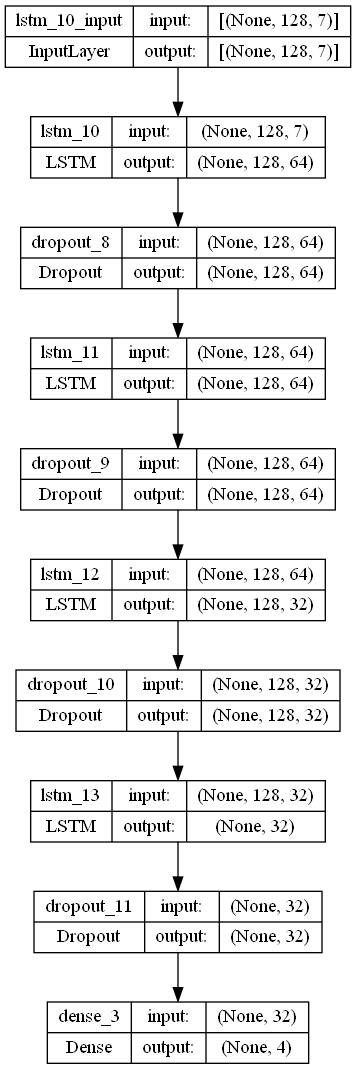

In [48]:
plot_model(model_stacked_lstm_dropout, show_shapes=True, show_layer_names=True)

In [37]:
history_stacked_lstm_dropout =  model_stacked_lstm_dropout.fit(train_data, train_labels, epochs=1,batch_size=512 ,validation_data=(val_data, val_labels))

169/169 [==============================] - 9s 56ms/step - loss: 0.0304 - accuracy: 0.9935 - val_loss: 2.2069 - val_accuracy: 0.7377


In [38]:
model_stacked_lstm_dropout.evaluate(test_data, test_labels)

672/672 [==============================] - 12s 18ms/step - loss: 0.3852 - accuracy: 0.9432


[0.3851759433746338, 0.9432003498077393]

### CNN

In [55]:


# cnn model FOR NETWORK TRAFFIC
model_cnn = keras.Sequential([
    keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling1D(pool_size=4),
    # dropout layer
    # keras.layers.Dropout(0.5),
    keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=4),
    # dropout layer
    # keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    # dropout layer
    keras.layers.Dense(num_labels, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [56]:
history_cnn = model_cnn.fit(train_data, train_labels, epochs=25,batch_size=256 ,validation_data=(val_data, val_labels))


Epoch 1/25
338/338 [==============================] - 3s 7ms/step - loss: 235.4661 - accuracy: 0.9527 - val_loss: 2175.3357 - val_accuracy: 0.7188
Epoch 2/25
338/338 [==============================] - 2s 7ms/step - loss: 7.3782 - accuracy: 0.9917 - val_loss: 1934.7554 - val_accuracy: 0.7351
Epoch 3/25
338/338 [==============================] - 2s 7ms/step - loss: 20.5694 - accuracy: 0.9883 - val_loss: 1316.2389 - val_accuracy: 0.7400
Epoch 4/25
338/338 [==============================] - 2s 6ms/step - loss: 7.6182 - accuracy: 0.9943 - val_loss: 2049.4973 - val_accuracy: 0.7276
Epoch 5/25
338/338 [==============================] - 2s 7ms/step - loss: 2.2537 - accuracy: 0.9973 - val_loss: 2008.8308 - val_accuracy: 0.7336
Epoch 6/25
338/338 [==============================] - 3s 7ms/step - loss: 1.4059 - accuracy: 0.9981 - val_loss: 1722.4668 - val_accuracy: 0.7405
Epoch 7/25
338/338 [==============================] - 2s 7ms/step - loss: 1.3700 - accuracy: 0.9980 - val_loss: 1753.9677 - val

In [57]:
model_cnn.evaluate(test_data, test_labels)

672/672 [==============================] - 3s 4ms/step - loss: 28.2219 - accuracy: 0.9382


[28.221864700317383, 0.9382187128067017]

### CNN + LSTM

In [49]:


# model CNN + LSTM
model_cnn_lstm = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.LSTM(64),
    keras.layers.Dense(num_labels, activation='softmax')
])

model_cnn_lstm.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_cnn_lstm.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 126, 64)           1408      
                                                                 
 conv1d_3 (Conv1D)           (None, 124, 64)           12352     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 62, 64)           0         
 1D)                                                             
                                                                 
 lstm_17 (LSTM)              (None, 64)                33024     
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
Total params: 47,044
Trainable params: 47,044
Non-trainable params: 0
__________________________________________________

In [50]:
history_cnn_lstm = model_cnn_lstm.fit(train_data, train_labels, epochs=25,batch_size=256 ,validation_data=(val_data, val_labels))


Epoch 1/25
338/338 [==============================] - 7s 16ms/step - loss: 0.7515 - accuracy: 0.6878 - val_loss: 1.4003 - val_accuracy: 0.3528
Epoch 2/25
338/338 [==============================] - 5s 14ms/step - loss: 0.6976 - accuracy: 0.6971 - val_loss: 1.6102 - val_accuracy: 0.5622
Epoch 3/25
338/338 [==============================] - 5s 15ms/step - loss: 0.5888 - accuracy: 0.7412 - val_loss: 1.5795 - val_accuracy: 0.3014
Epoch 4/25
338/338 [==============================] - 5s 15ms/step - loss: 0.6012 - accuracy: 0.7298 - val_loss: 2.0481 - val_accuracy: 0.2980
Epoch 5/25
338/338 [==============================] - 5s 15ms/step - loss: 0.5081 - accuracy: 0.7730 - val_loss: 2.2803 - val_accuracy: 0.3886
Epoch 6/25
338/338 [==============================] - 5s 13ms/step - loss: 0.5847 - accuracy: 0.7660 - val_loss: 2.0667 - val_accuracy: 0.5661
Epoch 7/25
338/338 [==============================] - 5s 14ms/step - loss: 0.5416 - accuracy: 0.7743 - val_loss: 1.7531 - val_accuracy: 0.5264

In [52]:
model_cnn_lstm.evaluate(test_data, test_labels)

672/672 [==============================] - 4s 6ms/step - loss: 0.3494 - accuracy: 0.8678


[0.3494032621383667, 0.867824375629425]

### cnn lstm stacked

In [ ]:

# model CNN + LSTM + LSTM
model_cnn_lstm_stacked = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(64,return_sequences=True),
    keras.layers.LSTM(64),
    keras.layers.Dense(num_labels, activation='softmax')
])


model_cnn_lstm_stacked.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [ ]:
history_cnn_lstm_stacked = model_cnn_lstm_stacked.fit(train_data, train_labels, epochs=25,batch_size=1024 ,validation_data=(val_data, val_labels))


In [ ]:
model_cnn_lstm_stacked.evaluate(test_data, test_labels)

### Bidirectional LSTM

In [75]:


model_bidirectional_LSTM = keras.Sequential()
model_bidirectional_LSTM.add(keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True), input_shape=input_shape))
model_bidirectional_LSTM.add(keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)))
model_bidirectional_LSTM.add(keras.layers.Bidirectional(keras.layers.LSTM(64)))
model_bidirectional_LSTM.add(keras.layers.Dense(32, activation='relu'))
model_bidirectional_LSTM.add(keras.layers.Dense(num_labels, activation='softmax'))
model_bidirectional_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bidirectional_LSTM.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 128, 256)         139264    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 128, 256)         394240    
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 32)                4128      
                                                                 
 dense_16 (Dense)            (None, 4)                 132       
                                                     

In [76]:
history_bidirectional_LSTM = model_bidirectional_LSTM.fit(train_data, train_labels, epochs=5,batch_size=1024 ,validation_data=(val_data, val_labels))


Epoch 1/5
85/85 [==============================] - 21s 156ms/step - loss: 0.0819 - accuracy: 0.9804 - val_loss: 2.3452 - val_accuracy: 0.7077
Epoch 2/5
85/85 [==============================] - 11s 134ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 1.9358 - val_accuracy: 0.5707
Epoch 3/5
85/85 [==============================] - 15s 173ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 1.6761 - val_accuracy: 0.6610
Epoch 4/5
85/85 [==============================] - 11s 133ms/step - loss: 0.0418 - accuracy: 0.9869 - val_loss: 2.4647 - val_accuracy: 0.6025
Epoch 5/5
85/85 [==============================] - 11s 134ms/step - loss: 0.0164 - accuracy: 0.9951 - val_loss: 2.2802 - val_accuracy: 0.7376


In [77]:
model_bidirectional_LSTM.evaluate(test_data, test_labels)

672/672 [==============================] - 20s 29ms/step - loss: 0.9391 - accuracy: 0.8614


[0.9390910267829895, 0.8613529205322266]

### Bidirectinnel avec dropout

In [55]:


model_bidirectional_LSTM_Dropout = keras.Sequential()
model_bidirectional_LSTM_Dropout.add(keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=True), input_shape=input_shape))
model_bidirectional_LSTM_Dropout.add(keras.layers.Dropout(0.5))
model_bidirectional_LSTM_Dropout.add(keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=True)))
model_bidirectional_LSTM_Dropout.add(keras.layers.Dropout(0.4))
model_bidirectional_LSTM_Dropout.add(keras.layers.Bidirectional(keras.layers.LSTM(16)))
model_bidirectional_LSTM_Dropout.add(keras.layers.Dropout(0.3))
model_bidirectional_LSTM_Dropout.add(keras.layers.Dense(32, activation='relu'))
model_bidirectional_LSTM_Dropout.add(keras.layers.Dense(num_labels, activation='softmax'))
model_bidirectional_LSTM_Dropout.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bidirectional_LSTM_Dropout.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128, 64)          10240     
 l)                                                              
                                                                 
 dropout_22 (Dropout)        (None, 128, 64)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128, 64)          24832     
 nal)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 128, 64)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                     

In [56]:
model_bidirectional_LSTM_Dropout.fit(train_data, train_labels, epochs=5,batch_size=1024 ,validation_data=(val_data, val_labels))

Epoch 1/5
85/85 [==============================] - 16s 108ms/step - loss: 0.4572 - accuracy: 0.8730 - val_loss: 2.5636 - val_accuracy: 0.5992
Epoch 2/5
85/85 [==============================] - 7s 87ms/step - loss: 0.0685 - accuracy: 0.9836 - val_loss: 2.1761 - val_accuracy: 0.7191
Epoch 3/5
85/85 [==============================] - 8s 89ms/step - loss: 0.0453 - accuracy: 0.9890 - val_loss: 2.3135 - val_accuracy: 0.7304
Epoch 4/5
85/85 [==============================] - 7s 87ms/step - loss: 0.0331 - accuracy: 0.9931 - val_loss: 3.6046 - val_accuracy: 0.5877
Epoch 5/5
85/85 [==============================] - 7s 85ms/step - loss: 0.0220 - accuracy: 0.9950 - val_loss: 3.5021 - val_accuracy: 0.5975


In [57]:
model_bidirectional_LSTM_Dropout.evaluate(test_data, test_labels)

672/672 [==============================] - 17s 25ms/step - loss: 0.7787 - accuracy: 0.8864


[0.7786852717399597, 0.8864006996154785]

### RNN

In [ ]:

model_rnn = keras.Sequential()
model_rnn.add(keras.layers.SimpleRNN(128, input_shape=input_shape, return_sequences=True))
model_rnn.add(keras.layers.SimpleRNN(128, return_sequences=True))
model_rnn.add(keras.layers.SimpleRNN(64, return_sequences=True))
model_rnn.add(keras.layers.SimpleRNN(64))
model_rnn.add(keras.layers.Dense(32, activation='relu'))
model_rnn.add(keras.layers.Dense(num_labels, activation='softmax'))
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()


In [ ]:
history_rnn = model_rnn.fit(train_data, train_labels, epochs=25,batch_size=256 ,validation_data=(val_data, val_labels))

In [ ]:
model_rnn.evaluate(test_data, test_labels)

### RNN LSTM

In [ ]:



model_rnn_lstm = keras.Sequential()
model_rnn_lstm.add(keras.layers.SimpleRNN(128, input_shape=input_shape, return_sequences=True))
model_rnn_lstm.add(keras.layers.SimpleRNN(128, return_sequences=True))
model_rnn_lstm.add(keras.layers.SimpleRNN(64, return_sequences=True))
model_rnn_lstm.add(keras.layers.LSTM(64))
model_rnn_lstm.add(keras.layers.Dense(32, activation='relu'))
model_rnn_lstm.add(keras.layers.Dense(num_labels, activation='softmax'))
model_rnn_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn_lstm.summary()


In [ ]:
history_rnn_lstm = model_rnn_lstm.fit(train_data, train_labels, epochs=25,batch_size=256 ,validation_data=(val_data, val_labels))


In [ ]:
model_rnn_lstm.evaluate(test_data, test_labels)

### CNN2D LSTM

In [ ]:





CNN2D_LSTM = keras.Sequential()
# conv 2D layer 
CNN2D_LSTM.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(train_data.shape[1], train_data.shape[2], 1)))
CNN2D_LSTM.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
CNN2D_LSTM.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
CNN2D_LSTM.add(keras.layers.Dropout(0.25))
# time distributed layer for output of conv2D
CNN2D_LSTM.add(keras.layers.TimeDistributed(keras.layers.Flatten()))
# LSTM layer
CNN2D_LSTM.add(keras.layers.LSTM(128, return_sequences=True))
CNN2D_LSTM.add(keras.layers.LSTM(64))
CNN2D_LSTM.add(keras.layers.Dense(32, activation='relu'))
CNN2D_LSTM.add(keras.layers.Dense(num_labels, activation='softmax'))
CNN2D_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN2D_LSTM.summary()


In [ ]:
history_CNN2D_LSTM = CNN2D_LSTM.fit(train_data, train_labels, epochs=25,batch_size=256 ,validation_data=(val_data, val_labels))


In [ ]:
CNN2D_LSTM.evaluate(test_data, test_labels)

### Model GRU


In [101]:


model_gru = keras.Sequential()
model_gru.add(keras.layers.GRU(128, input_shape=input_shape, return_sequences=True))
model_gru.add(keras.layers.GRU(128, return_sequences=True))
model_gru.add(keras.layers.GRU(64, return_sequences=True))
model_gru.add(keras.layers.GRU(64))
model_gru.add(keras.layers.Dense(32, activation='relu'))
model_gru.add(keras.layers.Dense(num_labels, activation='softmax'))
model_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 128, 128)          52608     
                                                                 
 gru_5 (GRU)                 (None, 128, 128)          99072     
                                                                 
 gru_6 (GRU)                 (None, 128, 64)           37248     
                                                                 
 gru_7 (GRU)                 (None, 64)                24960     
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 4)                 132       
                                                                 
Total params: 216,100
Trainable params: 216,100
Non-t

In [102]:
history_gru = model_gru.fit(train_data, train_labels, epochs=15,batch_size=512 ,validation_data=(val_data, val_labels))

Epoch 1/15
169/169 [==============================] - 17s 73ms/step - loss: 0.1121 - accuracy: 0.9679 - val_loss: 2.9052 - val_accuracy: 0.5823
Epoch 2/15
169/169 [==============================] - 11s 63ms/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 3.8807 - val_accuracy: 0.4110
Epoch 3/15
169/169 [==============================] - 10s 61ms/step - loss: 0.0202 - accuracy: 0.9942 - val_loss: 3.1715 - val_accuracy: 0.5935
Epoch 4/15
169/169 [==============================] - 11s 62ms/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 3.2473 - val_accuracy: 0.5951
Epoch 5/15
169/169 [==============================] - 10s 62ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 3.4527 - val_accuracy: 0.6118
Epoch 6/15
169/169 [==============================] - 10s 62ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 4.1645 - val_accuracy: 0.5938
Epoch 7/15
169/169 [==============================] - 10s 62ms/step - loss: 9.5506e-04 - accuracy: 0.9997 - val_loss: 4.1676 - val_accur

In [103]:
model_gru.evaluate(test_data, test_labels)

672/672 [==============================] - 12s 18ms/step - loss: 0.4691 - accuracy: 0.9392


[0.469127357006073, 0.9391964077949524]

### Big Gru

In [104]:
model_big_gru = keras.Sequential()
model_big_gru.add(keras.layers.GRU(512, input_shape=input_shape, return_sequences=True))
model_big_gru.add(keras.layers.GRU(512, return_sequences=True))
model_big_gru.add(keras.layers.GRU(256, return_sequences=True))
model_big_gru.add(keras.layers.GRU(256))
model_big_gru.add(keras.layers.Dense(32, activation='relu'))
model_big_gru.add(keras.layers.Dense(num_labels, activation='softmax'))
model_big_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_big_gru.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 128, 512)          800256    
                                                                 
 gru_9 (GRU)                 (None, 128, 512)          1575936   
                                                                 
 gru_10 (GRU)                (None, 128, 256)          591360    
                                                                 
 gru_11 (GRU)                (None, 256)               394752    
                                                                 
 dense_31 (Dense)            (None, 32)                8224      
                                                                 
 dense_32 (Dense)            (None, 4)                 132       
                                                                 
Total params: 3,370,660
Trainable params: 3,370,660
N

In [106]:
history_big_gru = model_big_gru.fit(train_data, train_labels, epochs=5,batch_size=256 ,validation_data=(val_data, val_labels))

: 

: 

In [ ]:
model_big_gru.evaluate(test_data, test_labels)

672/672 [==============================] - 16s 24ms/step - loss: 0.5274 - accuracy: 0.9051


[0.5274237394332886, 0.905116617679596]

## Metrics and visualisation

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import time 

def plot_evaluate(model, name, test_data, test_labels):
    #evaluate the model and get the accuracy and loss
    start = time.time()
    loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
    end = time.time()
    time_to_evaluate = end - start
    
    # plot the accuracy and loss as bar chart
    values = [accuracy, loss]
    colors = ['blue', 'orange']
    labels = ['accuracy', 'loss']
    x_pos = np.arange(len(labels))

    plt.bar(x_pos, values, color=colors)
    plt.xticks(x_pos, labels)
    plt.ylabel('Value')
    plt.title('Evaluation of Model: ' + name)
    if loss > 5:
        plt.ylim(0, 5)
        #write the loss value above the bar
        plt.text(1, 4.5, f'{loss:.2f}', ha='center', va='bottom', color='black', fontsize=12)
        # write the accuracy value above the bar
        plt.text(0, 0.5, f'{accuracy:.2f}', ha='center', va='bottom', color='black', fontsize=12)
    else:
        # write the exact value of each bar
        for i, v in enumerate(values):
            plt.text(i, v, str(round(v, 3)), ha='center', va='bottom')
        
    
        
    # write the number of parameters and time to evaluate
    num_params = model.count_params()
    
    plt.figtext(0.1, -0.1, f'Number of Parameters: {num_params}\nTime to Evaluate: {time_to_evaluate}', fontsize=12)
    
    plt.show()


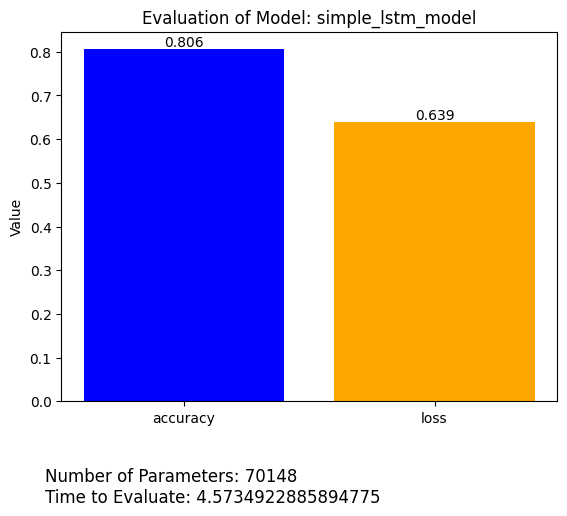

In [120]:
plot_evaluate(simple_lstm_model,'simple_lstm_model',history_simple_lstm,test_data,test_labels)

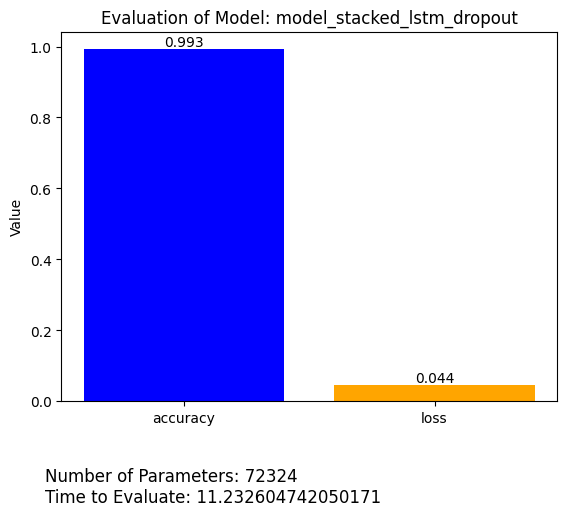

In [57]:
plot_evaluate(model_stacked_lstm_dropout,'model_stacked_lstm_dropout',test_data,test_labels)

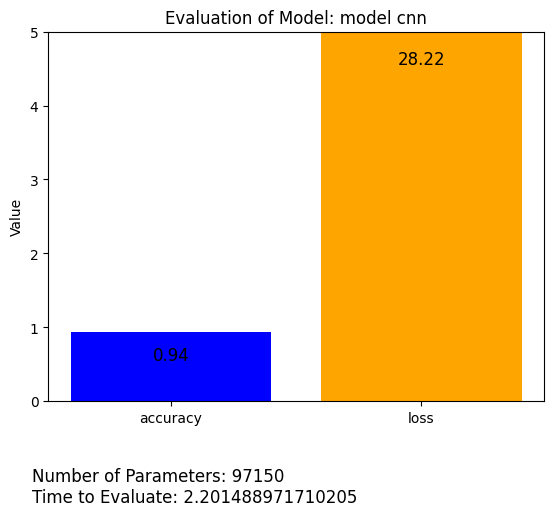

In [68]:
plot_evaluate(model_cnn,'model cnn',test_data,test_labels)

In [65]:
# save model
CNN2D_LSTM.save('CNN2D_LSTM.h5')

In [167]:
models_names = ['simple_lstm_model', 'model_stacked_lstm', 'model_cnn', 'model_cnn_lstm', 'model_cnn_lstm_stacked', 'model_bidirectional_LSTM', 'model_rnn', 'model_rnn_lstm', 'CNN2D_LSTM']
# history_list = [history_simple_lstm, history_stacked_lstm, history_cnn, history_cnn_lstm, history_cnn_lstm_stacked, history_bidirectional_LSTM, history_rnn_lstm, history_CNN2D_LSTM]

In [69]:
def plot_model_loss_accuracy(history,model_name,big_loss=False):
  """ Plot the model loss and accuracy for training and validation data

  Args:
      history (keras.callbacks.History): History object returned by model.fit()
      model_name (str): Name of the model
  """
  if big_loss:
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.plot(history.history['accuracy'], label="Training Accuracy")
    ax1.plot(history.history['val_accuracy'], label="Validation Accuracy")

    ax2 = ax1.twinx()  # create a second y-axis that shares the same x-axis as ax1
    ax2.set_ylabel('Loss')
    ax2.plot(history.history['loss'], label="Training Loss", color='tab:red')
    ax2.plot(history.history['val_loss'], label="Validation Loss", color='tab:orange')

    max_val_acc = max(history.history['val_accuracy'])
    max_val_acc_epoch = history.history['val_accuracy'].index(max_val_acc)
    ax1.plot(max_val_acc_epoch, max_val_acc, marker='o', markersize=5, color="red")
    ax1.annotate("Max Validation Accuracy: {:.2f}%".format(max_val_acc*100), (max_val_acc_epoch, max_val_acc), xytext=(max_val_acc_epoch, max_val_acc+0.05), arrowprops=dict(facecolor='black', shrink=0.05))

    ax1.set_title('Training and Validation Accuracy/Loss for ' + model_name)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()
  else:

    plt.plot(history.history['accuracy'],label="Training Accuracy")
    plt.plot(history.history['val_accuracy'],label="Validation Accuracy")

    plt.plot(history.history['loss'],label="Training Loss")
    plt.plot(history.history['val_loss'],label="Validation Loss")
    # plot the max validation accuracy
    max_val_acc = max(history.history['val_accuracy'])
    max_val_acc_epoch = history.history['val_accuracy'].index(max_val_acc)
    plt.plot(max_val_acc_epoch, max_val_acc, marker='o', markersize=5, color="red")
    plt.annotate("Max Validation Accuracy: {:.2f}%".format(max_val_acc*100), (max_val_acc_epoch, max_val_acc), xytext=(max_val_acc_epoch, max_val_acc+0.05), arrowprops=dict(facecolor='black', shrink=0.05))
    plt.title('Training and Validation Accuracy/Loss for ' + model_name)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/Loss')

    
    plt.legend()
    plt.show()

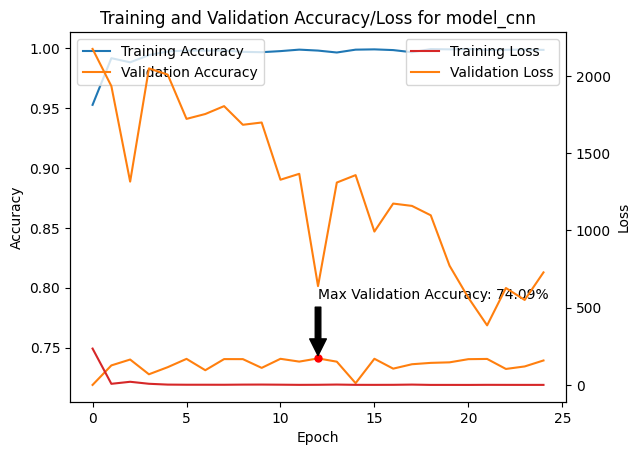

In [70]:
plot_model_loss_accuracy(history_cnn,'model_cnn',True)

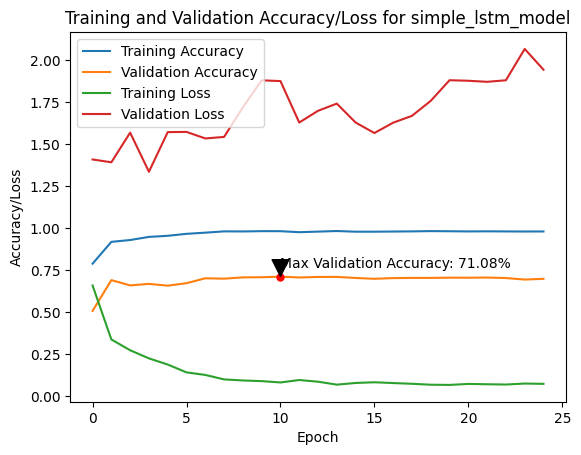

In [93]:
plot_model_loss_accuracy(history_simple_lstm, 'simple_lstm_model')

In [ ]:
plot_model_loss_accuracy(history_stacked )

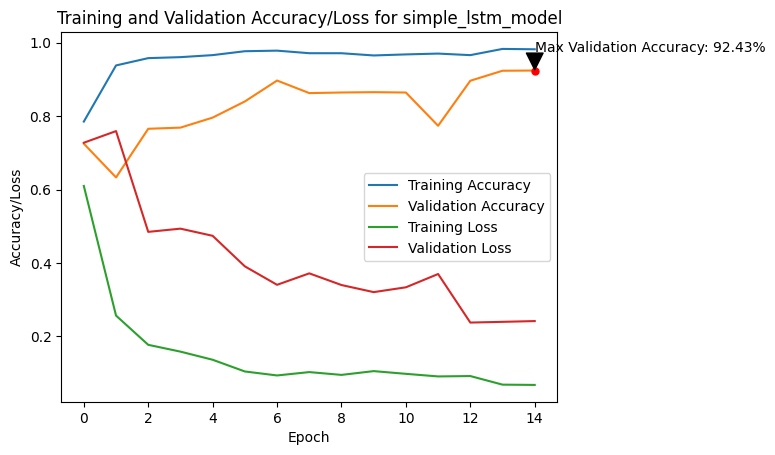

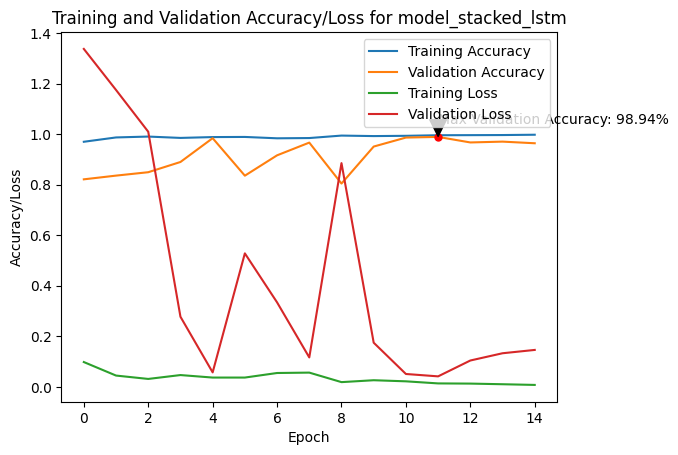

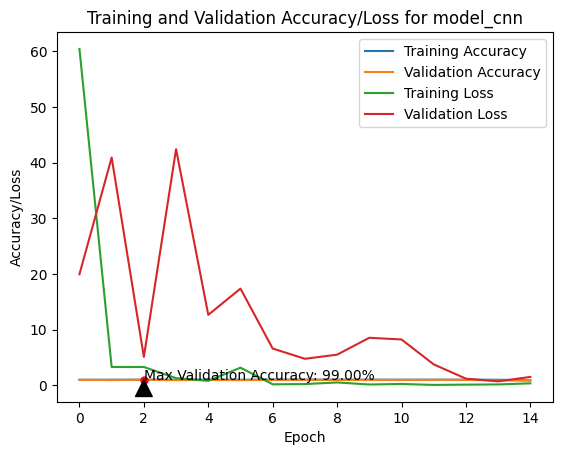

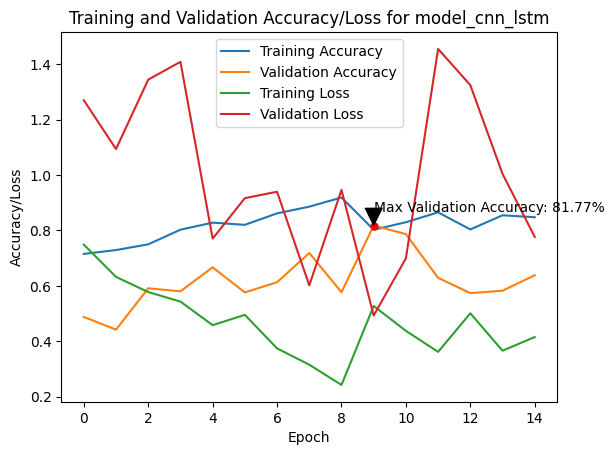

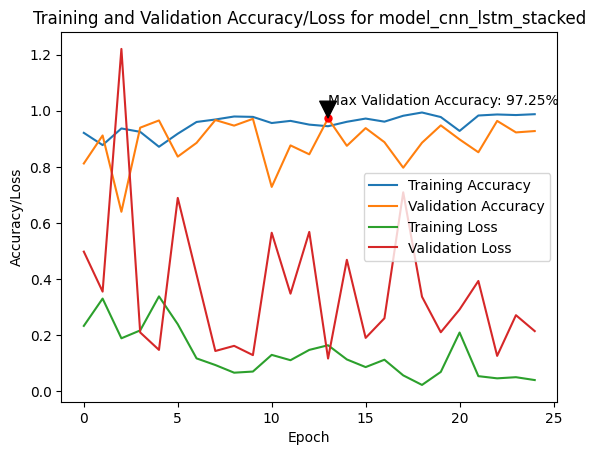

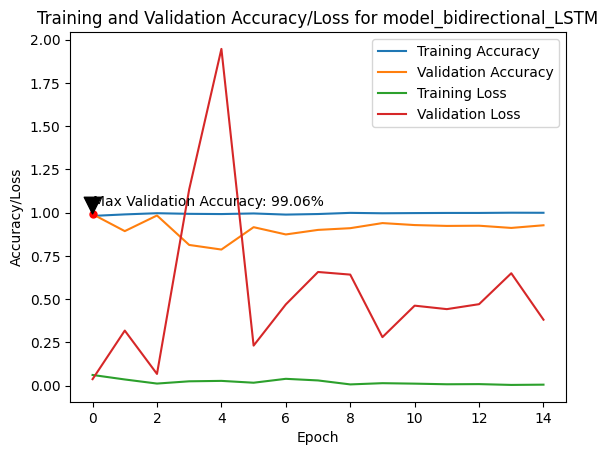

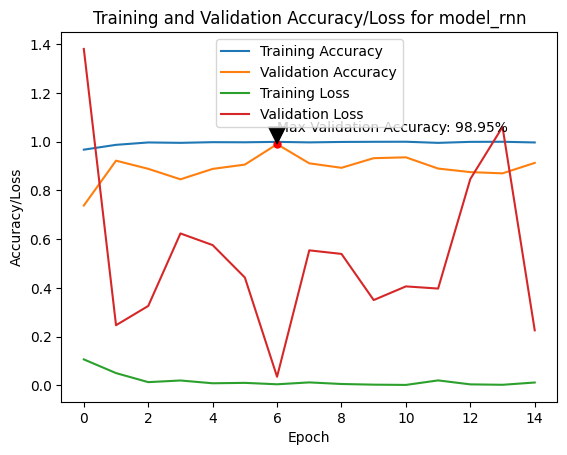

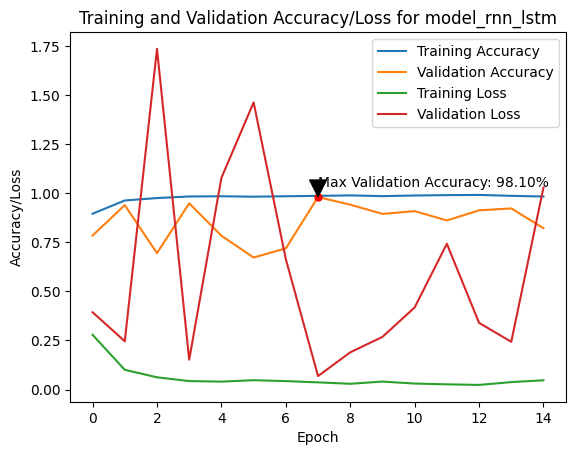

In [176]:
for history in history_list:
    name = models_names[history_list.index(history)]
    plot_model_loss_accuracy(history, name)

    



In [103]:
# evaluate all models
# simple_lstm_model.evaluate(test_data, test_labels)
# for model in model_list:
#     name = model_name[model_list.index(model)]
#     print(f'Evaluation of {name}')
#     model.evaluate(test_data, test_labels)
#     print()

model_cnn_lstm_stacked.evaluate(test_data, test_labels)

672/672 [==============================] - 7s 10ms/step - loss: 0.6045 - accuracy: 0.7708


[0.6044620871543884, 0.7707528471946716]

In [32]:
# confusion matrix on test data with original labels with label_encoder
def plot_confusion_matrix(model,test_data,test_labels,model_name):
    import itertools
    from sklearn.metrics import confusion_matrix


    y_pred = model.predict(test_data)
    y_pred = np.argmax(y_pred, axis=1)
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    # Generate confusion matrix
    cm = confusion_matrix(test_labels, y_pred)

    # Create a DataFrame from the confusion matrix using the label names
    cm_df = pd.DataFrame(cm, columns=label_encoder.classes_, index=label_encoder.classes_)

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm_df, annot=True,fmt='g')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    # plot with the name of the model
    plt.title(f'Confusion Matrix for {model_name}')



In [33]:
model_name = ['simple_lstm_model', 'model_stacked_lstm', 'model_cnn', 'model_cnn_lstm', 'model_cnn_lstm_stacked', 'model_bidirectional_LSTM', 'model_rnn', 'model_rnn_lstm', 'CNN2D_LSTM']

672/672 [==============================] - 11s 17ms/step


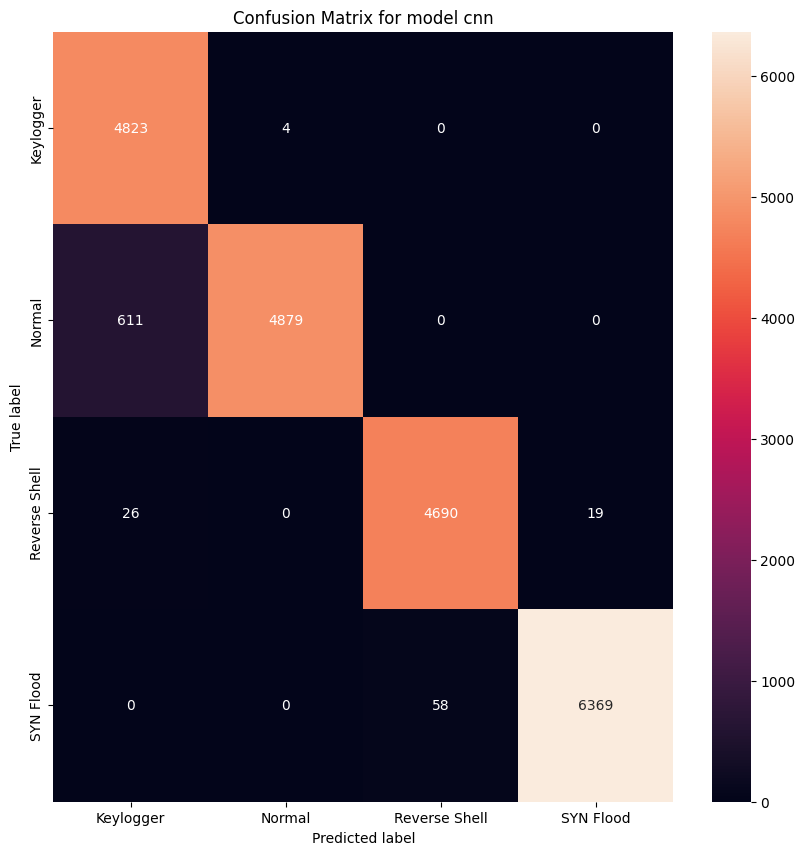

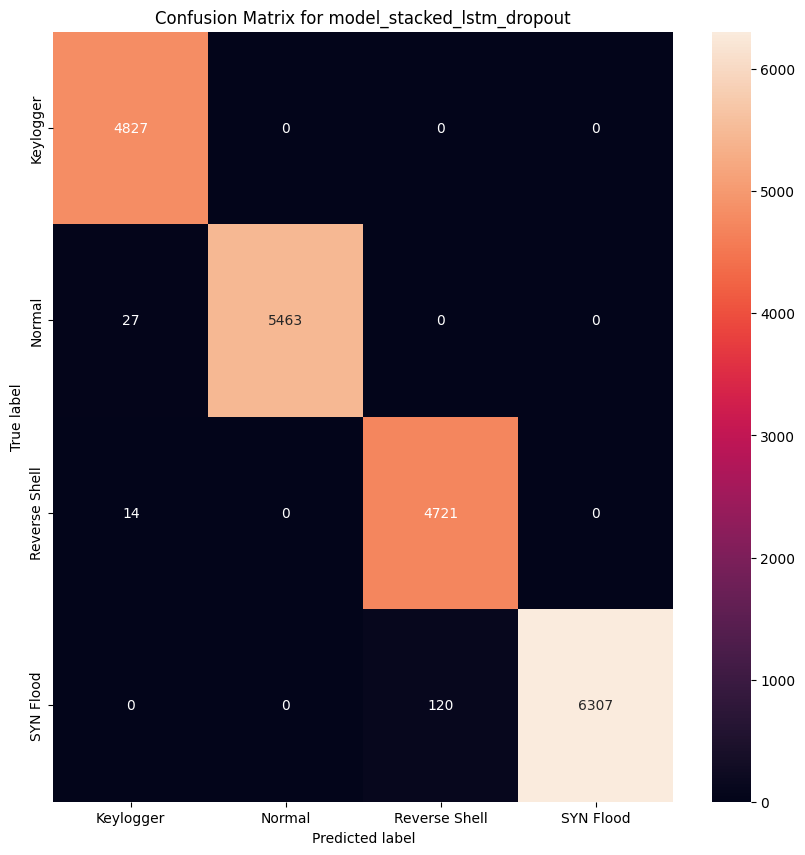

In [66]:
# plot_confusion_matrix(model_cnn_lstm_stacked,test_data,test_labels,model_name)
plot_confusion_matrix(model_cnn,test_data,test_labels,'model cnn')
# plot_confusion_matrix(model_rnn_lstm,test_data,test_labels,model_name)
# plot_confusion_matrix(model_rnn,test_data,test_labels,model_name)
# plot_confusion_matrix(model_bidirectional_LSTM,test_data,test_labels,model_name)
# plot_confusion_matrix(model_cnn_lstm,test_data,test_labels,model_name)
# plot_confusion_matrix(model_stacked_lstm,test_data,test_labels,model_name)
# plot_confusion_matrix(simple_lstm_model,test_data,test_labels,"simple_lstm_model")
# plot_confusion_matrix(CNN2D_LSTM,test_data,test_labels,model_name)
plot_confusion_matrix(model_stacked_lstm_dropout,test_data,test_labels,"model_stacked_lstm_dropout")


